# **Codsoft Task 1**

## **Titanic Survival Prediction**

Dataset link - https://raw.githubusercontent.com/v-dhanalakshmi/CodSoft/main/titanic_dataset.csv

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/v-dhanalakshmi/CodSoft/main/titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print(f"no.of rows = {df.shape[0]}")
print(f"no.of columns = {df.shape[1]}")

no.of rows = 418
no.of columns = 12


In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# statistical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Exploratory Data Analysis

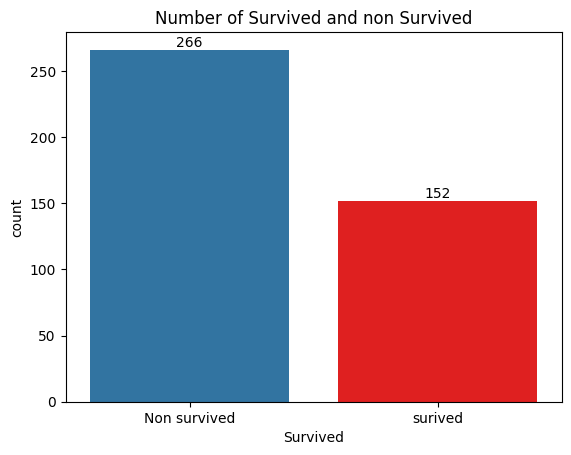

In [ ]:
# categorical attributes
blue = sns.color_palette()[0]
splot = sns.countplot(x = 'Survived', data = df,
                      palette = sns.blend_palette([blue, 'red'],2))

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('Number of Survived and non Survived')
plt.xticks(range(2) , labels=['Non survived', 'surived'])
plt.show()

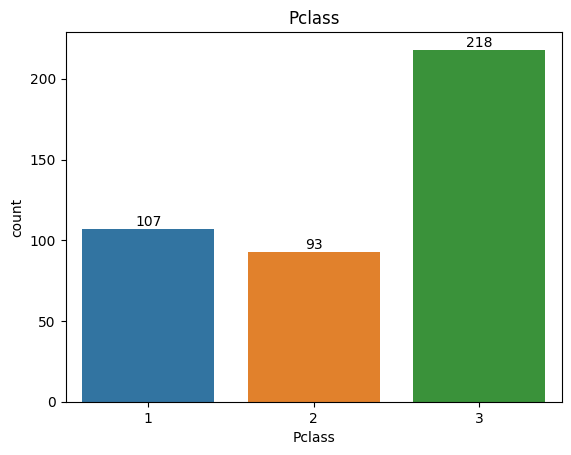

In [ ]:
splot = sns.countplot(x = 'Pclass', data = df)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('Pclass')
plt.show()

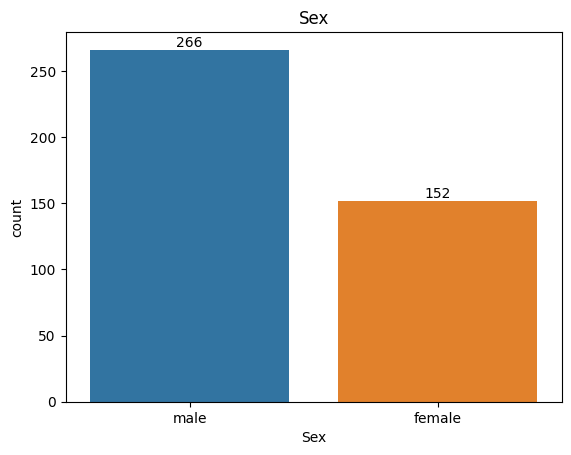

In [ ]:
splot = sns.countplot(x = 'Sex', data = df)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('Sex')
plt.show()

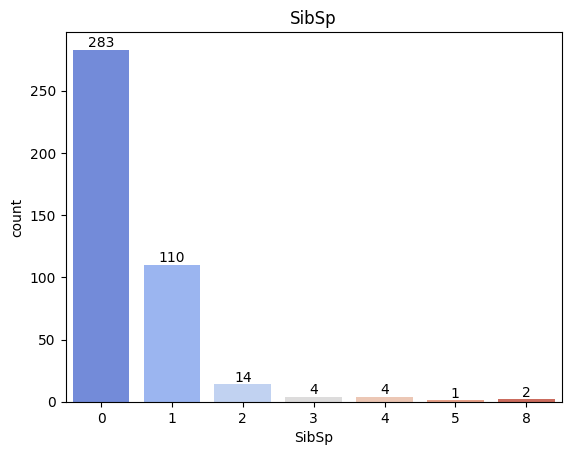

In [ ]:
splot = sns.countplot(x = 'SibSp', data = df, palette= "coolwarm")

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('SibSp')
plt.show()

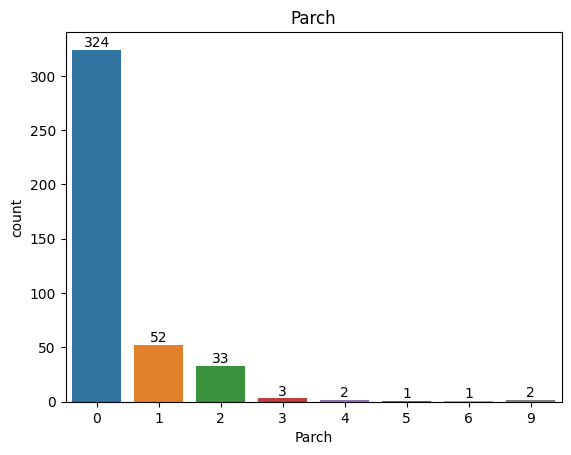

In [ ]:
splot = sns.countplot(x = 'Parch', data = df)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('Parch')
plt.show()

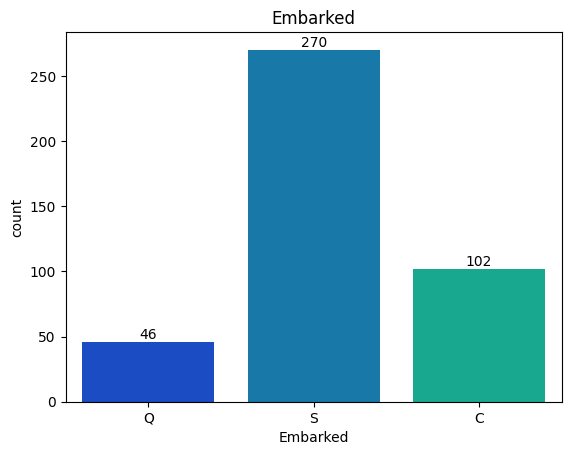

In [ ]:
splot = sns.countplot(x = 'Embarked', data = df, palette = 'winter')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.title('Embarked')
plt.show()

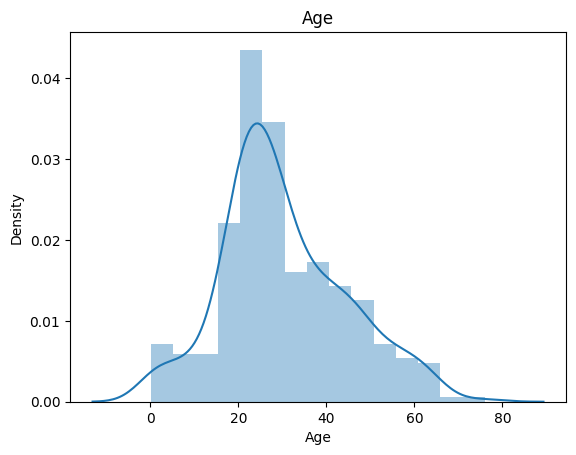

In [ ]:
## numerical attributes
sns.distplot(df['Age'])
plt.title('Age')
plt.show()

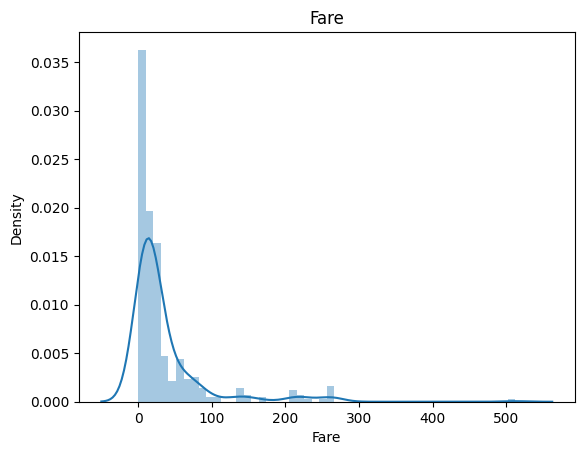

In [ ]:
sns.distplot(df['Fare'])
plt.title('Fare')
plt.show()

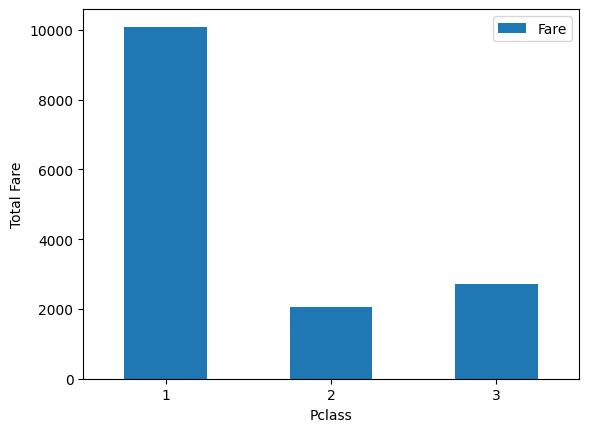

In [ ]:
class_fare = df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

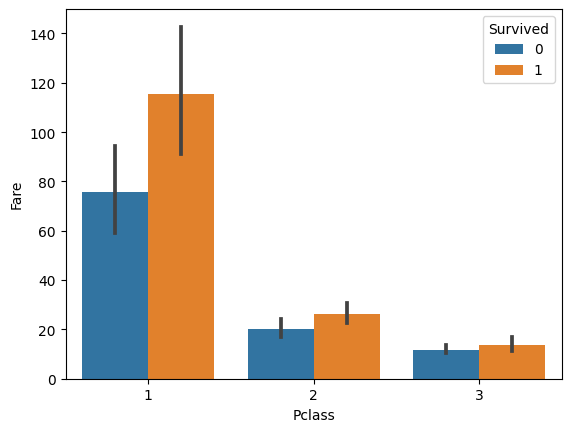

In [ ]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.show()

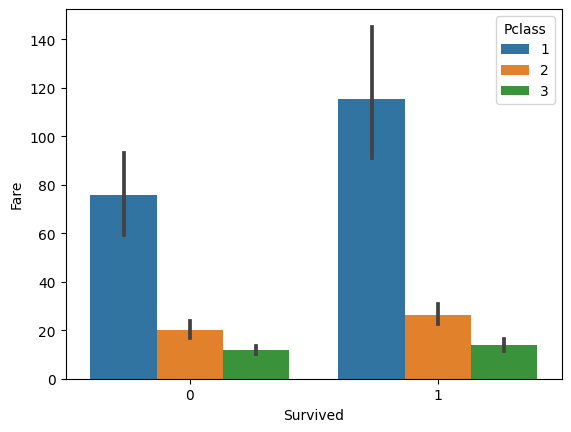

In [ ]:
sns.barplot(data=df, x='Survived', y='Fare', hue='Pclass')
plt.show()

## Data Preprocessing

In [ ]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [ ]:
round(df['Age'].mean(),2)

30.27

In [ ]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Log transformation for uniform data distribution

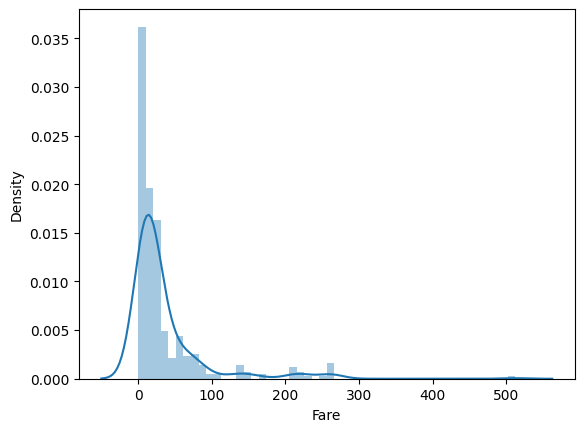

In [ ]:
sns.distplot(df['Fare'])
plt.show()

In [ ]:
df['Fare'] = np.log(df['Fare']+1)

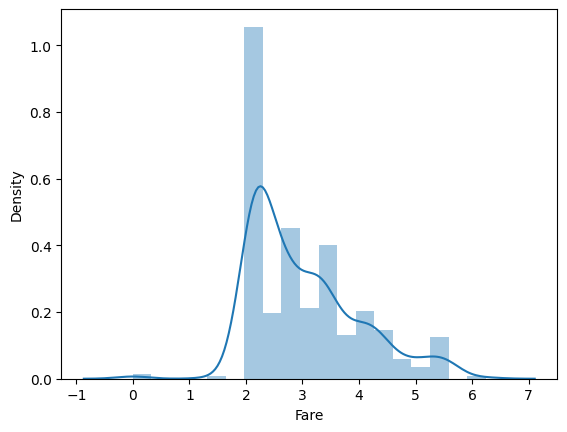

In [ ]:
sns.distplot(df['Fare'])
plt.show()

## Correlation Matrix

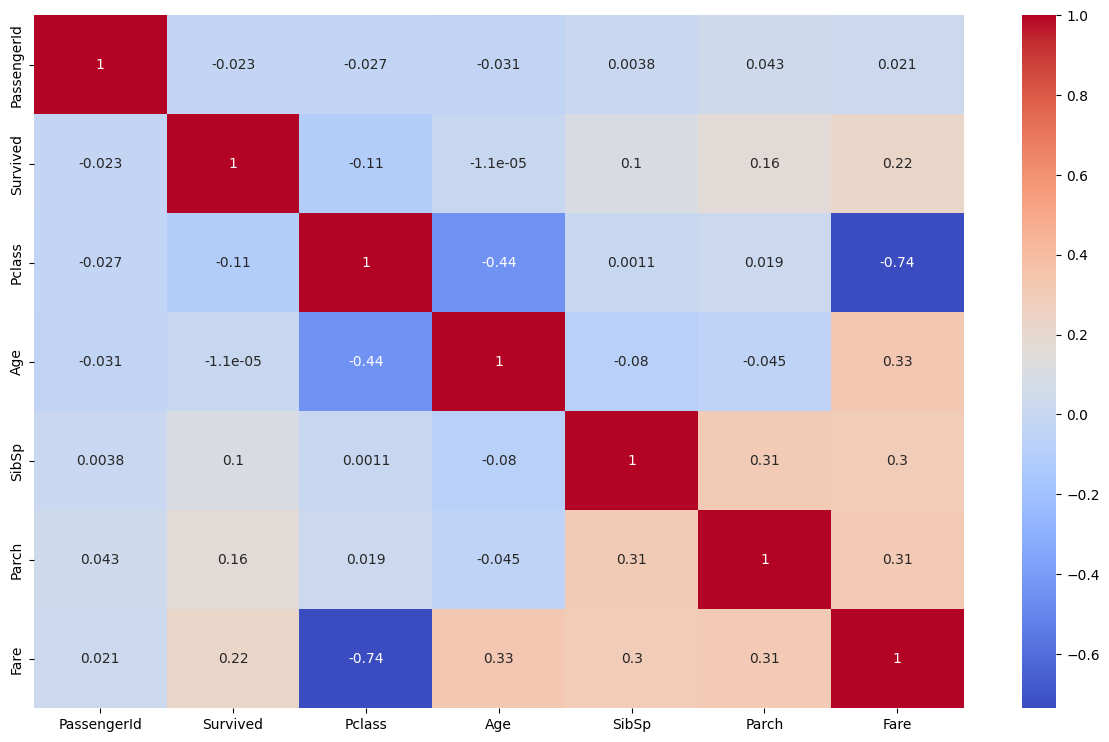

In [ ]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Label Encoding

In [ ]:
#Checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,2


In [ ]:
# Removed unwanted column.
df= df.drop(columns=['Ticket','Name','PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,2.178064,1
1,1,3,0,47.0,1,0,2.079442,2
2,0,2,1,62.0,0,0,2.369075,1
3,0,3,1,27.0,0,0,2.268252,2
4,1,3,0,22.0,1,1,2.586824,2


## Train-Test Split

In [ ]:
# input split
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

## Model Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [ ]:
lr = LogisticRegression()
print("Logistic Regression\n")
classify(lr)

Logistic Regression

Accuracy: 1.0
CV Score: 1.0


In [ ]:
dt = DecisionTreeClassifier()
print("Decision Tree Classifier\n")
classify(dt)

Decision Tree Classifier

Accuracy: 1.0
CV Score: 1.0


In [ ]:
rf = RandomForestClassifier()
print("Random Forest Classifier\n")
classify(rf)

Random Forest Classifier

Accuracy: 1.0
CV Score: 1.0




---

